# Trabalho Computacional I - Sistemas de Comunicações Digitais 2024.2

# Aluno: João Vitor de Oliveira Fraga

# Matrícula: 537377

Obs: As funções utilizadas nesse notebook estão no arquivo "DigitalModulation.py", que está na pasta enviada


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DigitalModulations import *

# Questão 1

In [2]:
# Parâmetros
M_symbols_QAM = [4, 16, 64] # Número de simbolos na constelação M-QAM
L_bits = 264000 # Número de bits a serem transmitidos
c_distance = 1 

for M in M_symbols_QAM:
    # Gerando bits aleatórios 
    bits = np.array([list(map(int, f"{i:0{int(np.log2(M))}b}")) for i in range(M)]).flatten()


    # Making a modulation
    qam_symbols, gray_labels = getQAM(bits, M, c_distance)
    
    energy = getEnergy(qam_symbols)
    print(f'A energia média para a modulação {M}-QAM é {energy:.2f}')

    min_distance = getMinDistance(qam_symbols)
    print(f'A distância mínima entre os símbolos para a modulação {M}-QAM é {min_distance:.2f}')


A energia média para a modulação 4-QAM é 2.00
A distância mínima entre os símbolos para a modulação 4-QAM é 2.00
A energia média para a modulação 16-QAM é 10.00
A distância mínima entre os símbolos para a modulação 16-QAM é 2.00
A energia média para a modulação 64-QAM é 42.00
A distância mínima entre os símbolos para a modulação 64-QAM é 2.00


Plotando a constelação 4-QAM com códigos Gray


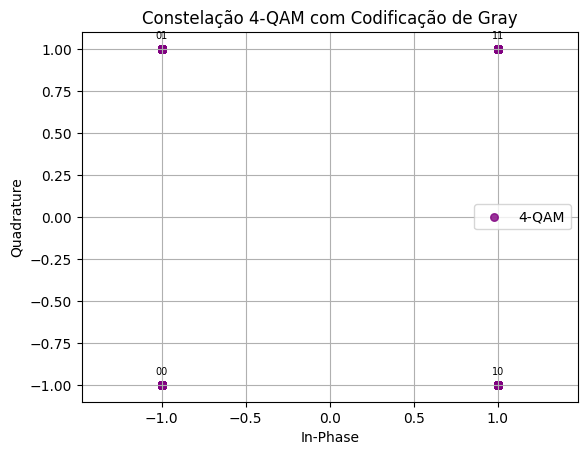

In [3]:
# Parâmetros
M = 4 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)


# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

# Plotando a constelação
plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='purple', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-QAM com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


Plotando a constelação 16-QAM com códigos Gray


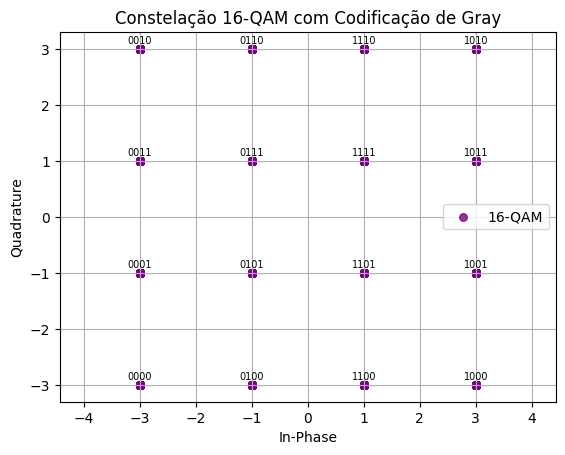

In [4]:
# Parâmetros
M = 16 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)

# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

# Plotando a constelação
plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='purple', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-QAM com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


Plotando a constelação 64-QAM com códigos Gray


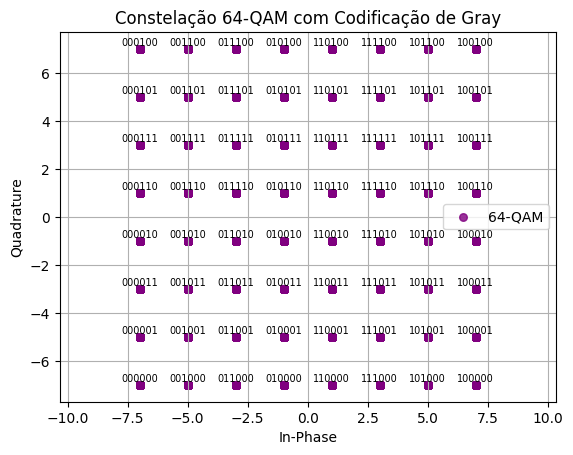

In [5]:
# Parâmetros
M = 64 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)
# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='purple', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray 
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-QAM com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


# Questão 2

Obtendo a SER para a modulação M-QAM, foi usada a equação:

$P_e = 4 \left( 1 - \frac{1}{\sqrt{M}} \right) Q\left( \sqrt{\frac{3 \cdot \frac{E_s}{N_0}}{M-1}} \right) - 4 \left( 1 - \frac{1}{\sqrt{M}} \right)^2 Q^2\left( \sqrt{\frac{3 \cdot \frac{E_s}{N_0}}{M-1}} \right)
$, onde $\frac{E}{N_0} = SNR$

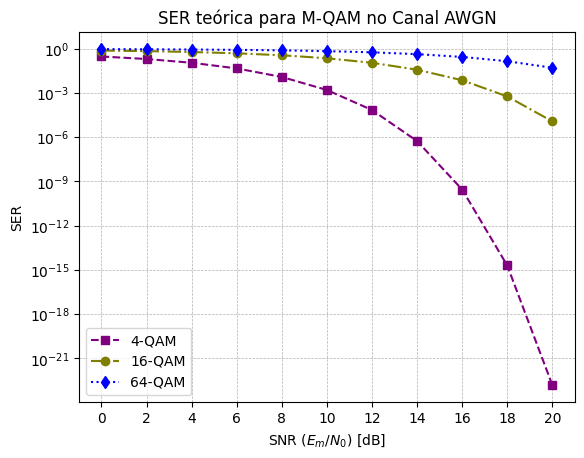

In [6]:
snr_range = np.arange(0, 22, 2) # SNR em dB
error_prob_theory_qam = [] 

for M in M_symbols_QAM:
    Pb = TheoricalErrorProbMQAM(M, snr_range)
    error_prob_theory_qam.append(Pb)

plt.figure()
plt.semilogy(snr_range, error_prob_theory_qam[0], '--s', label=f'{M_symbols_QAM[0]}-QAM', color='purple')
plt.semilogy(snr_range, error_prob_theory_qam[1], '-.o', label=f'{M_symbols_QAM[1]}-QAM', color='olive')
plt.semilogy(snr_range, error_prob_theory_qam[2], ':d', label=f'{M_symbols_QAM[2]}-QAM', color='blue')


# Configurações do gráfico
plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER teórica para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()  

# Questão 3

Fazendo então a simulação da SER e da BER de cada constelação {4, 16, 64}-QAM

In [8]:
SER_simulated_QAM = []
BER_simulated_QAM = []

for M in M_symbols_QAM:
    SER, BER = getSERandBER(bits, M, snr_range, modulation_type='QAM')
    SER_simulated_QAM.append(SER)
    BER_simulated_QAM.append(BER)


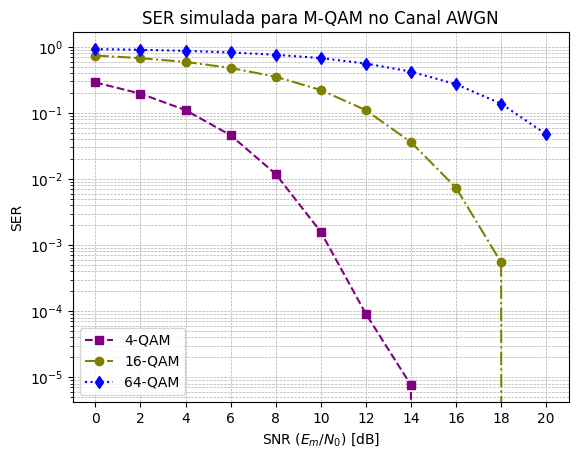

In [9]:
plt.figure()
plt.semilogy(snr_range, SER_simulated_QAM[0], '--s', label=f'{M_symbols_QAM[0]}-QAM', color='purple')
plt.semilogy(snr_range, SER_simulated_QAM[1], '-.o', label=f'{M_symbols_QAM[1]}-QAM', color='olive')
plt.semilogy(snr_range, SER_simulated_QAM[2], ':d', label=f'{M_symbols_QAM[2]}-QAM', color='blue')


plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER simulada para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

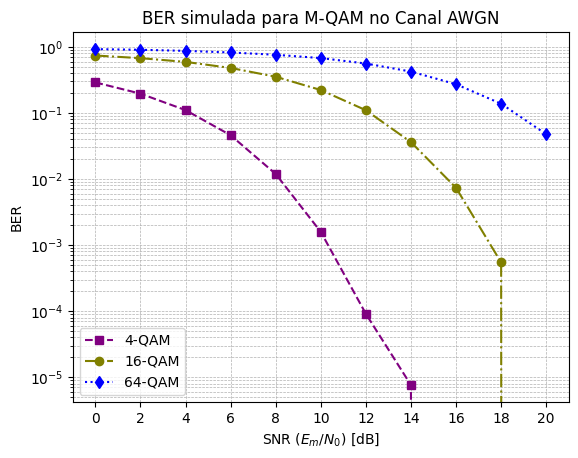

In [10]:
plt.figure()
plt.semilogy(snr_range, BER_simulated_QAM[0], '--s', label=f'{M_symbols_QAM[0]}-QAM', color='purple')
plt.semilogy(snr_range, BER_simulated_QAM[1], '-.o', label=f'{M_symbols_QAM[1]}-QAM', color='olive')
plt.semilogy(snr_range, BER_simulated_QAM[2], ':d', label=f'{M_symbols_QAM[2]}-QAM', color='blue')


plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('BER')
plt.title('BER simulada para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

# Questão 4


Repetindo o que foi feito nas questões anteriores, mas dessa vez para a constelação PSK, ficamos com os seguintes resultados:

É dito que $E_m$ para nossas contelações é $1$, isso implica que nossa constelação M-PSK, quando formos gerar, terá raio $=1$.

In [1]:
# Parametros
M_symbols_PSK= [4, 8] # Número de simbolos na constelação M-PSK
L_bits = 264000 # Número de bits a serem transmitidos

for M in M_symbols_PSK:
    # Gerando bits aleatórios 
    bits = np.array([list(map(int, f"{i:0{int(np.log2(M))}b}")) for i in range(M)]).flatten()


    # Modulação
    psk_symbols, gray_labels = getPSK(bits, M)
    
    energy = getEnergy(psk_symbols)
    print(f'A energia média para a modulação {M}-PSK é {energy:.2f}')

    min_distance = getMinDistance(psk_symbols)
    print(f'A distância mínima entre os símbolos para a modulação {M}-PSK é {min_distance:.2f}')


NameError: name 'np' is not defined

Plotando a constelação para 4-PSK

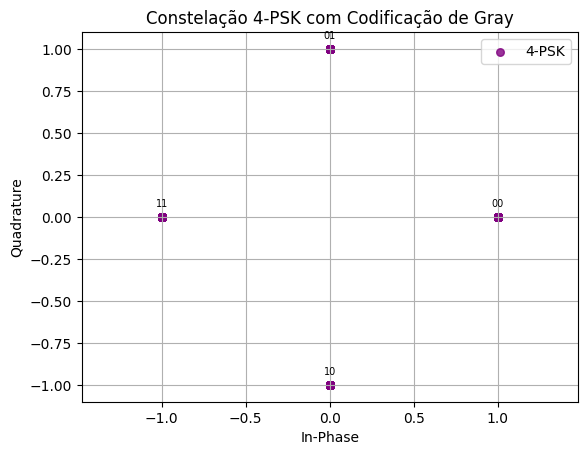

In [12]:
# Parâmetros
M = 4 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)


# Modulação
psk_symbols, gray_labels = getPSK(bits, M)

# Plotando a constelação
plt.scatter(psk_symbols.real, psk_symbols.imag, s=30, color='purple', label=f'{M}-PSK', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-PSK com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


Plotando a constelação para 8-PSK

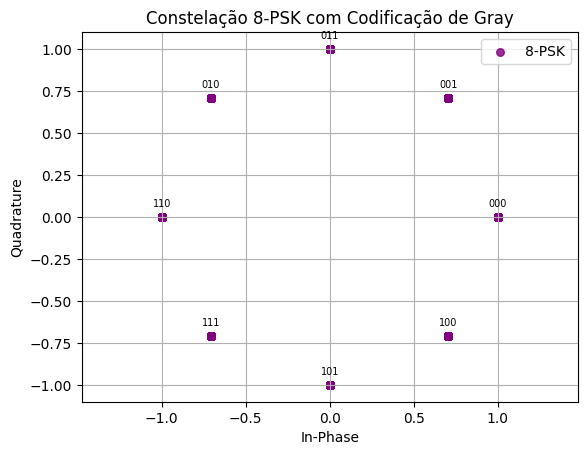

In [13]:
# Parâmetros
M = 8 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)


# Modulação
psk_symbols, gray_labels = getPSK(bits, M)

# Plotando a constelação
plt.scatter(psk_symbols.real, psk_symbols.imag, s=30, color='purple', label=f'{M}-PSK', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-PSK com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


Obtendo a SER para a modulação M-PSK, foi usada a equação:

$P_e \approx 2 Q \left(\sqrt{\frac{2E}{N_0}}sen(\frac{\pi}{M})\right)$, onde $\frac{E}{N_0} = SNR$

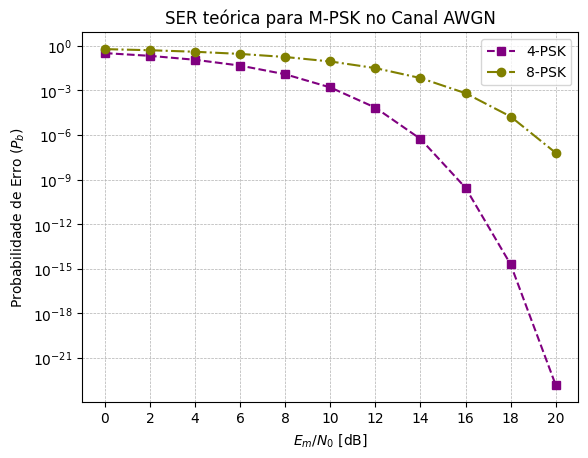

In [14]:
error_prob_theory_psk = [] 

for M in M_symbols_PSK:
    Pb = TheoricalErrorProbMPSK(M, snr_range)
    error_prob_theory_psk.append(Pb)

plt.figure()
plt.semilogy(snr_range, error_prob_theory_psk[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, error_prob_theory_psk[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')


# Configurações do gráfico
plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('Probabilidade de Erro ($P_b$)')
plt.title('SER teórica para M-PSK no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()  

In [15]:
SER_simulated_PSK = []
BER_simulated_PSK = []

for M in M_symbols_PSK:
    SER, BER = getSERandBER(bits, M, snr_range, modulation_type='PSK')
    SER_simulated_PSK.append(SER)
    BER_simulated_PSK.append(BER)


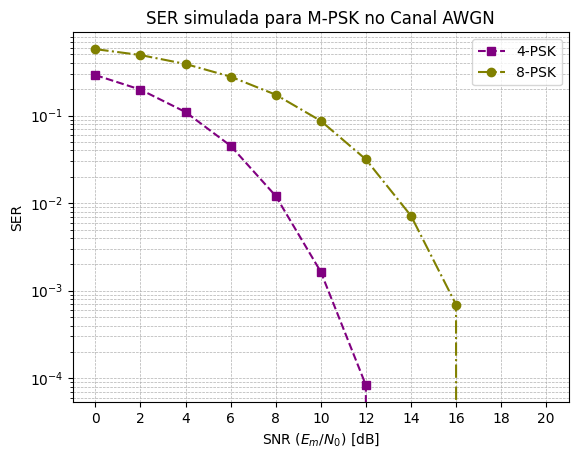

In [16]:
plt.figure()
plt.semilogy(snr_range, SER_simulated_PSK[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, SER_simulated_PSK[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')


plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER simulada para M-PSK no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

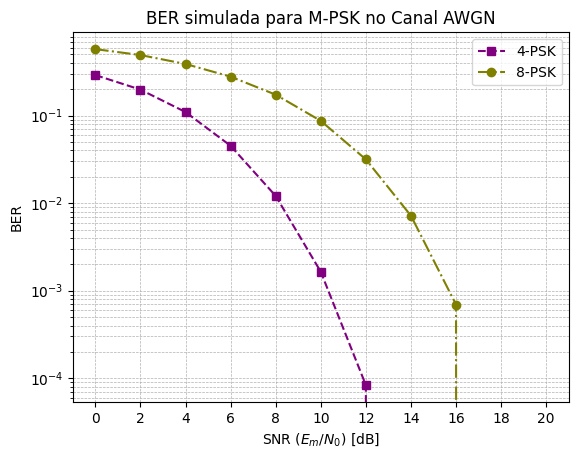

In [17]:
plt.figure()
plt.semilogy(snr_range, BER_simulated_PSK[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, BER_simulated_PSK[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')


plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('BER')
plt.title('BER simulada para M-PSK no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

# Questão 5

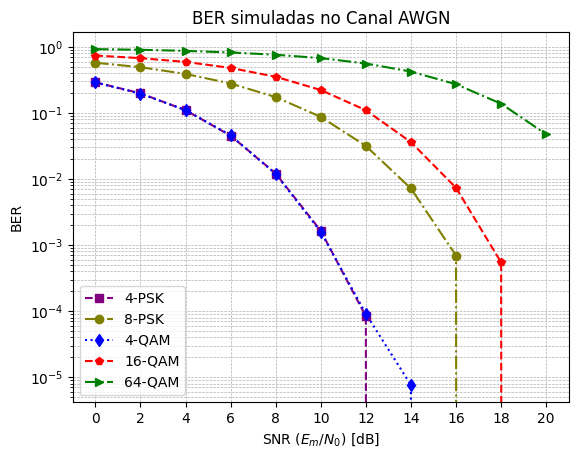

In [18]:
plt.figure()
plt.semilogy(snr_range, BER_simulated_PSK[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, BER_simulated_PSK[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')
plt.semilogy(snr_range, BER_simulated_QAM[0], ':d', label=f'{M_symbols_QAM[0]}-QAM', color='blue')
plt.semilogy(snr_range, BER_simulated_QAM[1], '--p', label=f'{M_symbols_QAM[1]}-QAM', color='red')
plt.semilogy(snr_range, BER_simulated_QAM[2], '-.>', label=f'{M_symbols_QAM[2]}-QAM', color='green')

plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('BER')
plt.title('BER simuladas no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

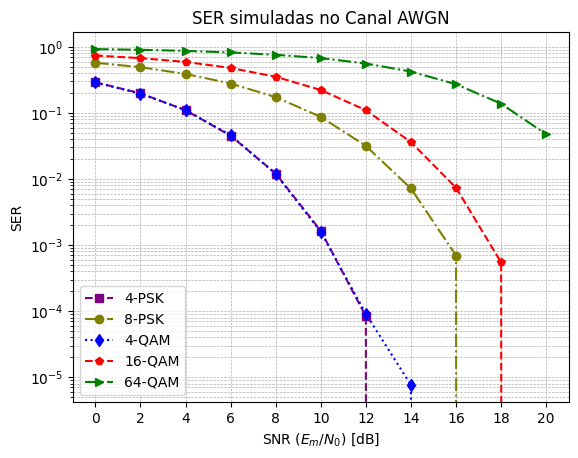

In [19]:
plt.figure()
plt.semilogy(snr_range, SER_simulated_PSK[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, SER_simulated_PSK[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')
plt.semilogy(snr_range, SER_simulated_QAM[0], ':d', label=f'{M_symbols_QAM[0]}-QAM', color='blue')
plt.semilogy(snr_range, SER_simulated_QAM[1], '--p', label=f'{M_symbols_QAM[1]}-QAM', color='red')
plt.semilogy(snr_range, SER_simulated_QAM[2], '-.>', label=f'{M_symbols_QAM[2]}-QAM', color='green')

plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER simuladas no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

Em relação as constelações 4-QAM e 4-PSK é visto que as curvas de SER e BER simuladas é praticamente sobreposta, isso ocorre pois as modulações são quase as mesmas, tendo como diferença uma defasagem de $45°$. No entando, devido a distância do 4-QAM, essa modulação apresenta uma maior energia média.

Agora a 8-PSK e a 16-QAM apresentam curvas bem diferentes, por mais que em todos os casos de SNR, tanto a BER quanto a SER da 8-PSK seja menor em comparação com a 16-QAM, também é necessário ver que a 8-PSK está transmitindo a metade de simbolos possiveis em comparação com a 16-QAM. Mas assim como no caso anterior, a energia média para a modulação QAM é maior que a PSK.

Por último a modulação 64-QAM obteve uma curva de erro significativamente grande em comparação com as outras modulações e obteve uma energia média bem maior também. Por transmitir mais simbolos, e usando de um maior espaço na constelação sua energia foi maior, e como temos vários simbolos distribuidos de maneira próxima, sua taxa de erro tanto de bit quanto de símbolo acaba por ser grande, já que sabemos que quanto maior a ordem da modulação, maior será o meu erro.

Concluímos então que cada tipo de modulação tem sua vantagem, dependendo então da finalidade do projeto que eu quero entregar, se eu vou priorizar erro, eficiência energética, entre outros KPIs possíveis.

Temos então que o trabalho computacional conseguiu cumprir com as orientações das questões e se comportando de tal maneira que a análise foi como o previsto.